# Plots

In [1]:
load('~/codebases/cortical_disorders2/data/graphical.rda', verbose=T)

Loading objects:
  GeneAnnotation
  meta.colors
  facets


In [2]:
load('~/codebases/cortical_disorders2/results/RCT_diseases/plots/DiseaseCoreOrders.rda', verbose=T)

Loading objects:
  core.order
  core.levels
  dis.order
  dis.levels


In [3]:
pdir <- '~/codebases/cortical_disorders2/results/RCT_diseases/plots/heatmapsneww/'
dir.create(pdir, showWarnings = F, recursive = F)
setwd(pdir)

In [4]:
library(dplyr)
library(ggplot2)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
figsize <- function(x,y){
    options(repr.plot.width=x, repr.plot.height=y)
}

In [6]:
figsize(10,7)

# Data

In [7]:
# RCT <- readRDS('~/codebases/cortical_disorders2/results/RCT_diseases/cisTarget_results.permuted.rds')
RCT <- readRDS('~/codebases/cortical_disorders2/results/RCT_diseases/cisTarget_results.rds')

In [8]:
exp.data <- read.csv('~/codebases/cortical_disorders2/data/nico_expression_log2.original_genes.csv', row.names=1)

In [10]:
DiseaseTbl <- RCT$input.df

DiseaseRegTarTbl <- data.frame(do.call('cbind', lapply(colnames(DiseaseTbl), 
      function(x){
          as.numeric(rownames(DiseaseTbl) %in% unique(subset(RCT$regulonTbl, geneSet==x)$Target))
      })), row.names=rownames(DiseaseTbl))
colnames(DiseaseRegTarTbl) <- colnames(DiseaseTbl)

DiseaseRegSouTbl <- data.frame(do.call('cbind', lapply(colnames(DiseaseTbl), 
      function(x){
          as.numeric(rownames(DiseaseTbl) %in% unique(subset(RCT$regulonTbl, geneSet==x)$Core))
      })), row.names=rownames(DiseaseTbl))
colnames(DiseaseRegSouTbl) <- colnames(DiseaseTbl)

Discolors = rev(c(None='white', Risk='darkslategray3', Target='orange', Source='darkred'))


risk.df <- reshape2::melt(data.frame(Gene=rownames(DiseaseTbl), 
                                     DiseaseTbl), 
    id.vars='Gene',
    variable.name='Disease',
    value.name='Risk')

targets.df <- reshape2::melt(data.frame(Gene=rownames(DiseaseRegTarTbl), 
                                        DiseaseRegTarTbl*2), 
    id.vars='Gene',
    variable.name='Disease',
    value.name='Target')

sources.df <- reshape2::melt(data.frame(Gene=rownames(DiseaseRegSouTbl),
                                        DiseaseRegSouTbl*3), 
    id.vars='Gene',
    variable.name='Disease',
    value.name='Source')


assoc.df <- merge(risk.df, targets.df,
                  by=c('Gene', 'Disease'), all=T)
assoc.df <- merge(assoc.df, sources.df, 
                  by=c('Gene', 'Disease'), all=T)

assoc.df[is.na(assoc.df)] <- 0

assoc.df$DiseaseState <- ifelse(
    apply(assoc.df[,-c(1,2)]==0, MARGIN = 1, all), 
    'None', 
    colnames(assoc.df)[-c(1,2)][apply(assoc.df[,-c(1,2)], MARGIN = 1, which.max)])    

assoc.df$Disease <- factor(as.character(assoc.df$Disease), colnames(DiseaseTbl))



assoc.mat <- reshape2::dcast(assoc.df, 'Gene ~ Disease', value.var='DiseaseState') %>% as.matrix()
rownames(assoc.mat) <- assoc.mat[,'Gene']
assoc.mat <- assoc.mat[, -1]

In [10]:
sampleColor_df <- unique(GeneAnnotation[,c('PeakSample', 'PeakSampleFct')])

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


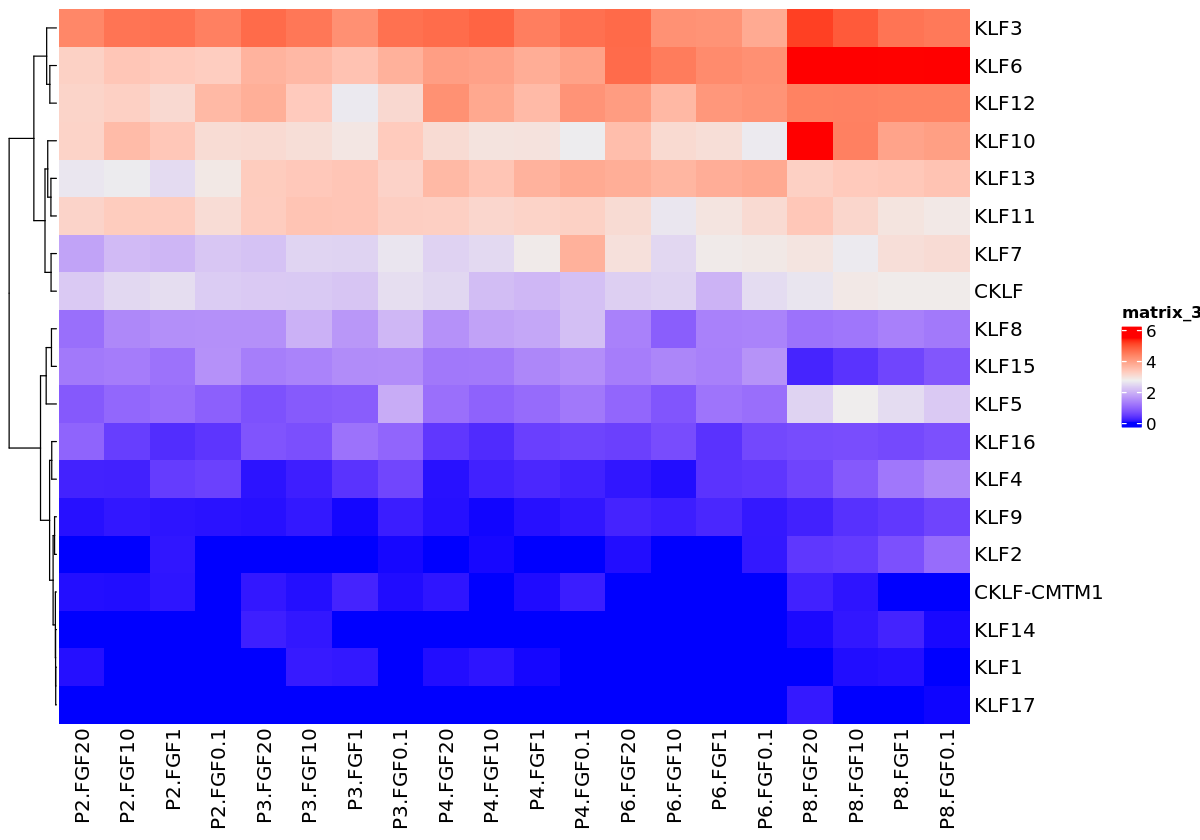

In [17]:
Heatmap(exp.data[grep(rownames(exp.data), pattern='KLF'),], cluster_columns = F)

In [15]:
exp.data[grep('KLF'),]

ERROR: Error in is.factor(x): argument "x" is missing, with no default


,P2.FGF20,P2.FGF10,P2.FGF1,P2.FGF0.1,P3.FGF20,P3.FGF10,P3.FGF1,P3.FGF0.1,P4.FGF20,P4.FGF10,P4.FGF1,P4.FGF0.1,P6.FGF20,P6.FGF10,P6.FGF1,P6.FGF0.1,P8.FGF20,P8.FGF10,P8.FGF1,P8.FGF0.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KLF3,4.33568333,4.58392820,4.61220504,4.42396131,4.71134622,4.54562248,4.19826626,4.62905348,4.69188586,4.79673271,4.44929724,4.6386821,4.72119764,4.17979765,4.1605249,3.8142735,5.17383901,4.90607284,4.58606214,4.52532348
KLF6,3.20793969,3.37416312,3.32045579,3.26811995,3.67601911,3.59377206,3.43815976,3.70573467,3.98875739,3.94399632,3.76711448,3.9341013,4.69979591,4.48598061,4.2712987,4.2005279,5.54679879,5.59616292,5.48423482,5.55983134
KLF12,3.16600838,3.22351523,3.07775571,3.58885253,3.74389191,3.31036921,2.68115687,3.09141211,4.19247826,3.84871807,3.56525596,4.1507221,4.02932920,3.60056711,4.0958569,4.1616297,4.40560441,4.40969642,4.39246855,4.38925704
KLF10,3.18148425,3.55385197,3.36618231,3.03869955,3.06348569,3.00032457,2.86580007,3.30470086,3.05406702,2.92328232,2.93198556,2.7221818,3.50231787,3.06965062,3.0016401,2.6883818,5.49155491,4.42090678,3.91995021,3.98515429
KLF13,2.64073660,2.70524808,2.50650039,2.84659360,3.28984922,3.34094675,3.39399272,3.18216787,3.58587592,3.39598133,3.68440359,3.8131245,3.75373288,3.63450034,3.7628590,3.8258467,3.22200078,3.32145193,3.34823242,3.42962935
KLF11,3.16761484,3.28899339,3.27735994,3.03173042,3.28411432,3.41773102,3.39278451,3.24570861,3.23710477,3.12412959,3.17814095,3.2085485,3.04631643,2.63587045,2.8994850,3.0603933,3.36268028,3.12911813,2.91057918,2.83911307
KLF7,1.77959592,2.07884890,2.02219024,2.23826715,2.18320065,2.41202273,2.39509023,2.63508105,2.38432616,2.47337131,2.80262751,3.7093348,2.96017806,2.45656962,2.8032890,2.8316746,2.90379028,2.68708309,2.99369247,3.04488368
CKLF,2.27783601,2.46079498,2.52438970,2.30599970,2.27028972,2.26951197,2.21983452,2.54337215,2.44530294,2.11626494,2.03776876,2.1563319,2.34562346,2.39503537,1.9874664,2.5115439,2.62372642,2.83925419,2.79000045,2.78416892
KLF8,1.10339692,1.42540559,1.52411384,1.53520693,1.54022570,1.96173444,1.62063333,2.04257430,1.54774594,1.76489812,1.83487299,2.1402224,1.34096098,0.88846077,1.3399925,1.3683772,1.14365463,1.19194159,1.33090254,1.23884799


# Heatmaps

In [9]:
library(ComplexHeatmap)
library(circlize)

Loading required package: grid

ComplexHeatmap version 2.15.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements a

In [13]:
bicor.col <- colorRamp2(c(-1, 0, 1),
                         c("purple", "white", "green"))

In [14]:
lgd_bicor <- Legend(title = "Expression correlation (bicor)", col_fun = bicor.col, at = c(-1,0,1) )
lgd_sig <- Legend(title = "Correlation significance", pch = 1, type = "points", labels = "< 0.05")


# Runs

In [ ]:
targetLists <- lapply(split(RCT$regulonTbl$Target, paste(RCT$regulonTbl$geneSet, RCT$regulonTbl$Core)), unique)

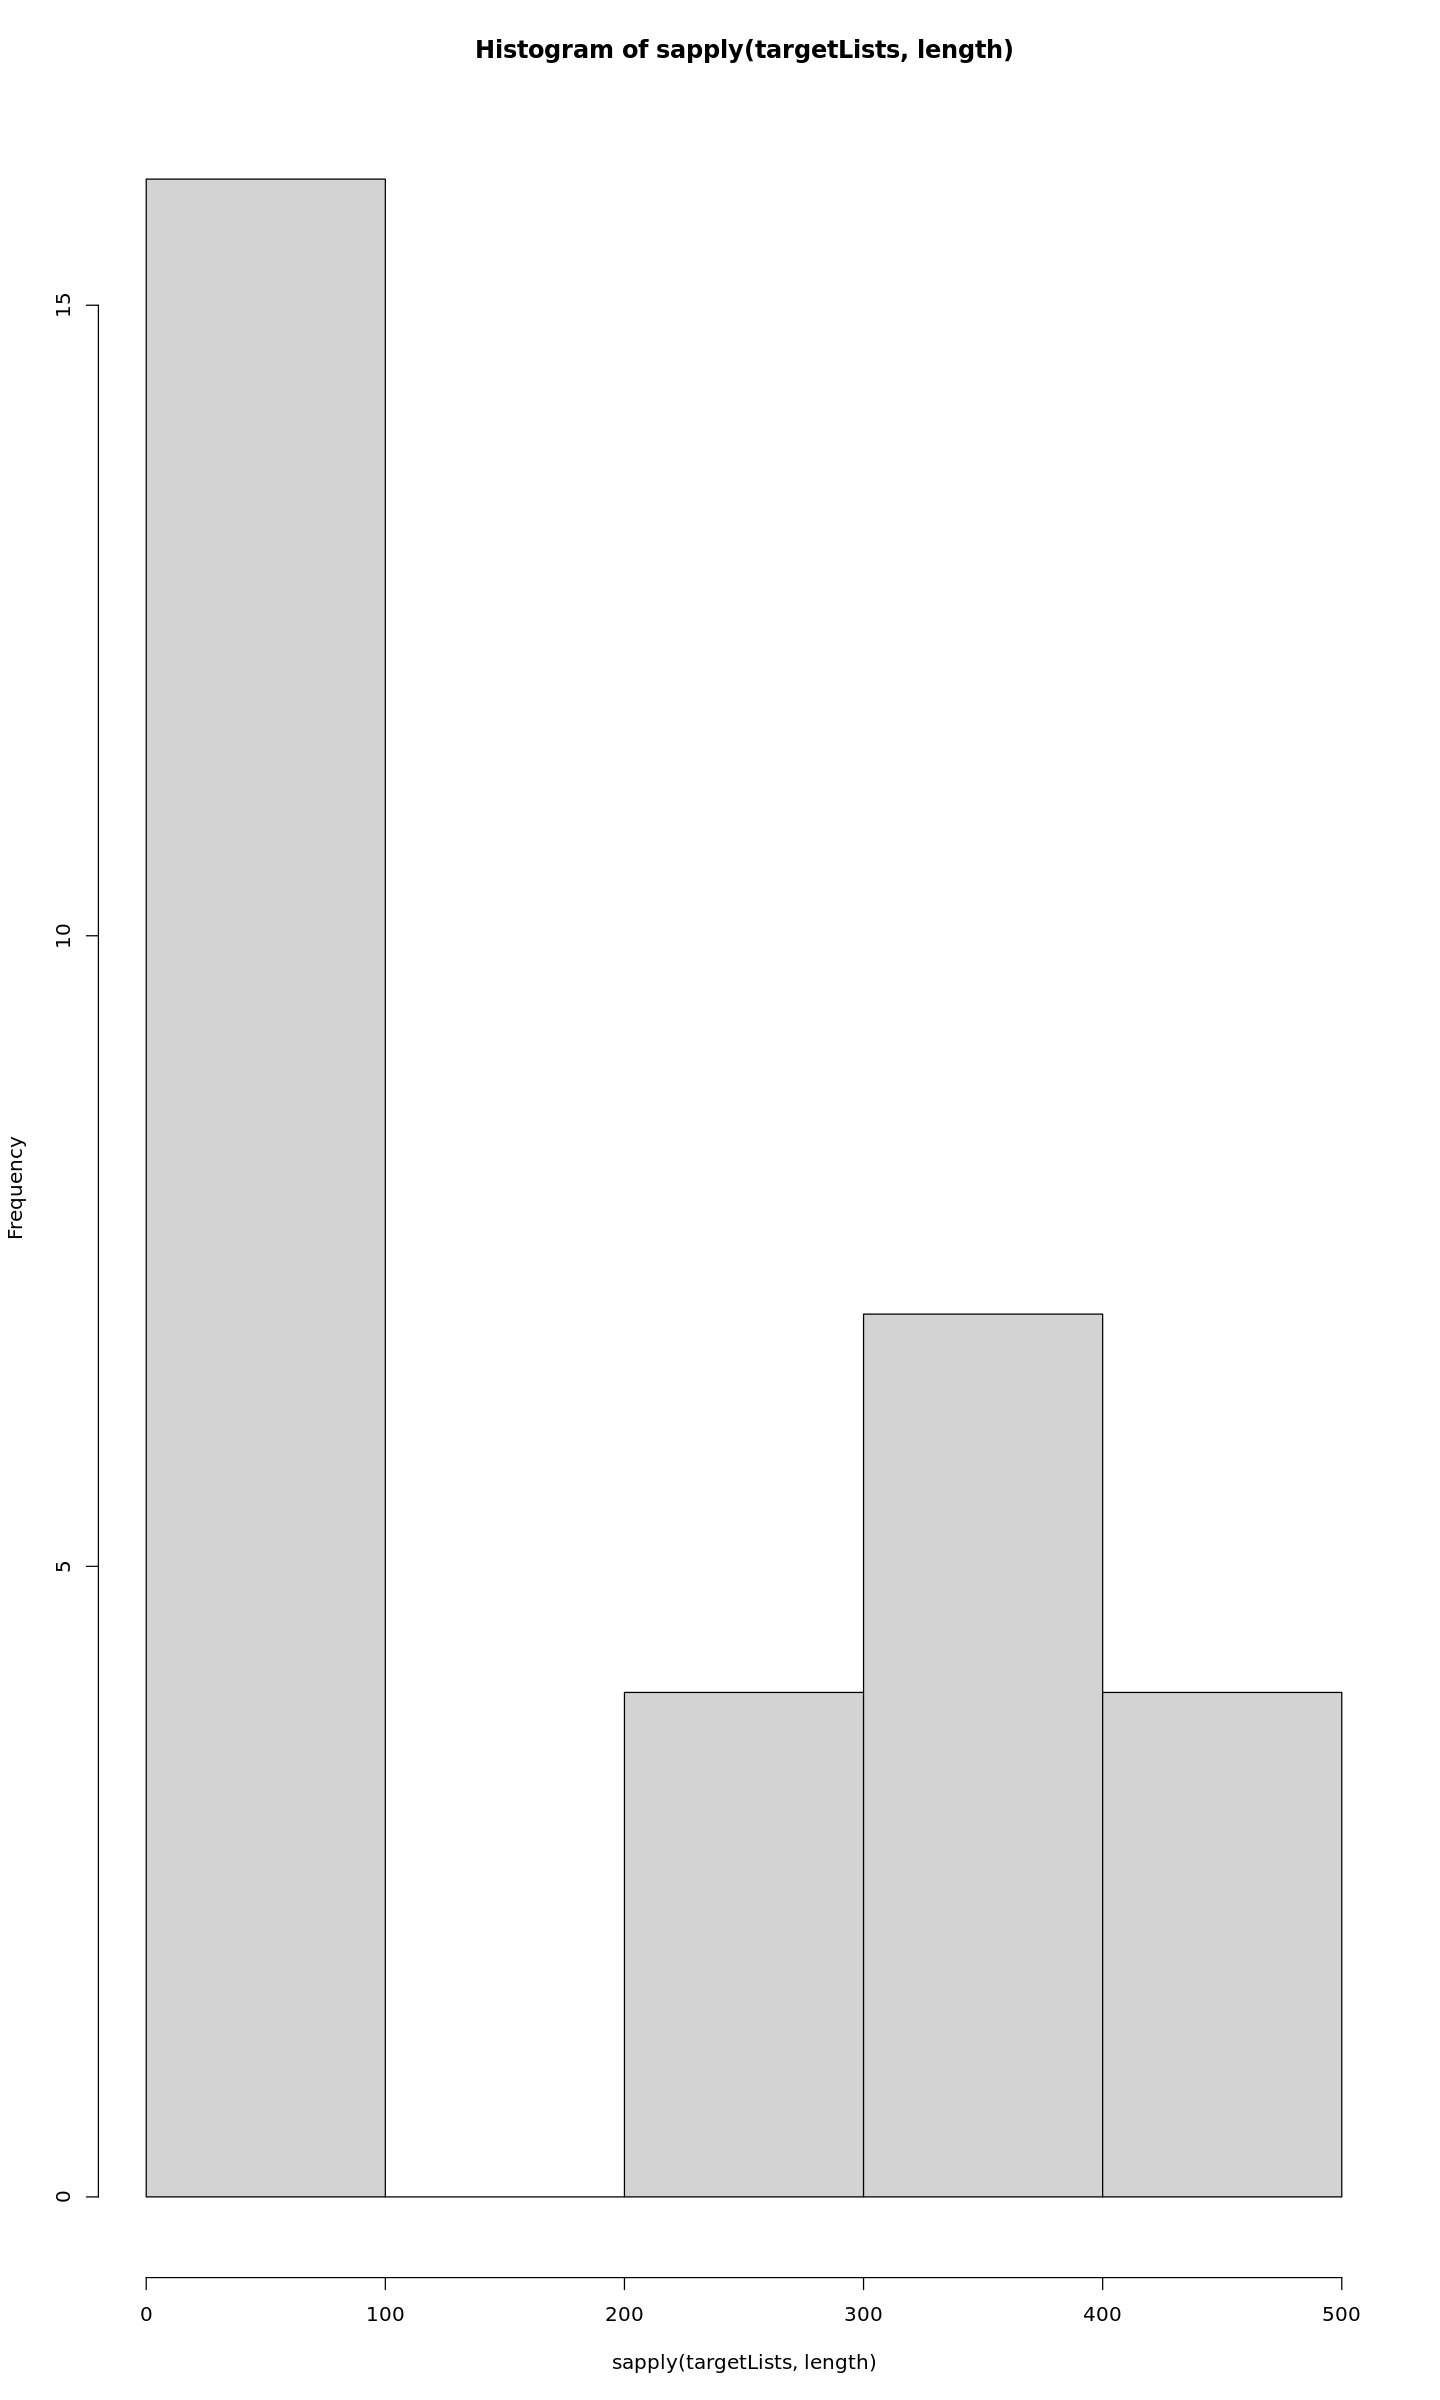

In [ ]:
hist(sapply(targetLists, length) )

### Tests

In [15]:
geneset <- 'ASD'
core <- 'EGR3'

In [23]:
for (geneset in unique(RCT$regulonTbl$geneSet)){
    for (core in unique(subset(RCT$regulonTbl, geneSet==geneset)$Core)){


        genes <- unique(c(core, subset(RCT$regulonTbl, Core==core & geneSet==geneset)$Target))
        ngenes <- length(genes)

        message(paste(geneset, core, ngenes, sep='\t'))

        # Plotting parameters
        line.size <- ifelse(ngenes >100, 0, 1)
        point.size <- unit(if(ngenes >100) 2 else 4, "mm")
        font.size <- if(ngenes < 100) 12 else 12-(ngenes-100)/100*2
        message(paste('- line:', line.size, '\t- point', point.size, '\t- font', font.size))
        if (font.size < 3){
            message('- Showing only other cores')
            font.sizes <- ifelse(
                genes %in% unique(RCT$regulonTbl$Core),
                12, 0)
        } else {
            font.sizes <- c(12, rep(font.size, times = ngenes-1))
        }

        # Get disease association
        disrisk_mat <- assoc.mat[genes,]

        # Get correlations
        cordf <- subset(
                RCT$bicorRes$bicorRes,
                geneSet == geneset & Core == core & Target %in% genes)[,c('Target', 'bicor','bicor.p')]
        # Choose significant
        cordf <- cordf %>% mutate(pch=ifelse(bicor.p<0.05, 1, NA))

        # Reorder
        rownames(cordf) <- cordf$Target
        cordf <- cordf[genes, ]
        rownames(cordf) <- genes

        # Prepare heatmap annotations
        ## Peak sample for X axis
        peak_ha <- HeatmapAnnotation(
            `In vitro sample` = levels(sampleColor_df$PeakSampleFct), 
            col = list(`In vitro sample` = meta.colors$PeakSample),
            show_legend = c(`In vitro sample` = FALSE),
            border = TRUE
        )
        ## Peak sample for genes
        peak_ra <- rowAnnotation(
            `Peak Sample` = GeneAnnotation[genes, 'PeakSampleFct'], 
            col = list(`Peak Sample` = meta.colors$PeakSample),
            na_col = "white",
            border = TRUE
        )
        ## Diseases and bicor
        right_ra <- rowAnnotation(

            Bicorrelation = anno_simple(
                cordf$bicor, pch=cordf$pch, 
                pt_size = point.size,
                col = bicor.col),

            `Disease association` = assoc.mat[genes,], 

            col = list(`Disease association` = Discolors),
            na_col = "white",

            gp = gpar(col = "grey", lwd = line.size),
            gap = unit(2, "mm"),

            show_legend = T,
            border = TRUE
        )


        # Get expression and scale it
        mat <- t(apply(as.matrix(exp.data[genes, ]), 1, scale))
        colnames(mat) <- colnames(exp.data)
        # Define expression range
        exp.rng <- max(abs(min(mat)), abs(max(mat)))
        exp.col <- colorRamp2(breaks = c(-exp.rng, 0, exp.rng), colors = c('blue', 'lightyellow', 'tomato'))

        # Create heatmap
        ht <- Heatmap(

            mat,
            name='Scaled expression', 
            col = exp.col,
            left_annotation = peak_ra,
            top_annotation = peak_ha,
            right_annotation = right_ra,

            row_order=genes,
            row_split=GeneAnnotation[genes, 'PeakSampleFct'],
            column_split = sapply(strsplit(colnames(mat) , '.', fixed=T), function(x){x[[1]]}),
            cluster_row_slices = FALSE, 

            row_names_side = "left",
            row_title=NULL,
            column_names_rot = 45, 
            column_names_side = "top",
            column_title='In vitro sample',

            cluster_rows = cluster::agnes,
            cluster_columns = FALSE,

            row_dend_reorder = FALSE,
            row_dend_width = unit(2, "cm"),


            rect_gp = gpar(col = "white", lwd = line.size),
            row_gap = unit(0, "mm"),
            column_gap = unit(0, "mm"), 
            border = TRUE,

            row_names_gp = gpar(
                col = c("red", rep('black', times = ngenes-1)),
                fontsize = font.sizes
            )



        )
        # Add bicor legends
        ht <- draw(ht, annotation_legend_list = list(lgd_bicor, lgd_sig))

        # Estimate height
        h <- ifelse(ngenes >100, 27, ngenes*0.25+2)

        # Save
        pdf(paste('Expression_heatmap', geneset, core, 'pdf', sep='.'), width = 18, height = h)
        draw(ht)
        dev.off()        
        
    }
}

ASD	ARNT2	203

- line: 0 	- point 2mm 	- font 9.94

ASD	CHD1	420

- line: 0 	- point 2mm 	- font 5.6

ASD	EGR3	455

- line: 0 	- point 2mm 	- font 4.9

ASD	EP300	340

- line: 0 	- point 2mm 	- font 7.2

ASD	GLIS1	242

- line: 0 	- point 2mm 	- font 9.16

ASD	GTF2I	241

- line: 0 	- point 2mm 	- font 9.18

ASD	KLF16	485

- line: 0 	- point 2mm 	- font 4.3

ASD	MTF1	358

- line: 0 	- point 2mm 	- font 6.84

ASD	PAX5	388

- line: 0 	- point 2mm 	- font 6.24

ASD	SIN3A	320

- line: 0 	- point 2mm 	- font 7.6

ASD	TAF1	321

- line: 0 	- point 2mm 	- font 7.58

ASD	THRA	392

- line: 0 	- point 2mm 	- font 6.16

ASD	VDR	332

- line: 0 	- point 2mm 	- font 7.36

ASD	VEZF1	463

- line: 0 	- point 2mm 	- font 4.74

ASD	YY1	224

- line: 0 	- point 2mm 	- font 9.52

BD_2019	ZNF101	14

- line: 1 	- point 4mm 	- font 12

DD	CNOT3	34

- line: 1 	- point 4mm 	- font 12

DD	CTCF	36

- line: 1 	- point 4mm 	- font 12

DD	EP300	48

- line: 1 	- point 4mm 	- font 12

DD	PURA	51

- line: 1 	- point 4mm 	- 